In [35]:
import pandas as pd

goals = pd.read_csv("fbref/Big5Shot1920.csv",header=[0,1])
print(goals)
new_cols = []
for col in goals.columns:
    new_cols.append(col[1])
goals.columns = new_cols
goals["Player"] = goals["Player"].apply(lambda x: x.split("\\")[0])
goals["Nation"] = goals["Nation"].apply(lambda x: x.split(" ")[1])

     Unnamed: 0_level_0                       Unnamed: 1_level_0  \
                     Rk                                   Player   
0                     1  Patrick van Aanholt\Patrick-van-Aanholt   
1                     2                    Max Aarons\Max-Aarons   
2                     3        Yunis Abdelhamid\Yunis-Abdelhamid   
3                     4    Suleiman Abdullahi\Suleiman-Abdullahi   
4                     5                  Mehdi Abeid\Mehdi-Abeid   
...                 ...                                      ...   
2707               2708              Bongani Zungu\Bongani-Zungu   
2708               2709        Szymon Żurkowski\Szymon-Zurkowski   
2709               2710            David Zurutuza\David-Zurutuza   
2710               2711          Martin Ødegaard\Martin-Odegaard   
2711               2712             Filip Đuričić\Filip-Djuricic   

     Unnamed: 2_level_0 Unnamed: 3_level_0 Unnamed: 4_level_0  \
                 Nation                Pos        

IndexError: list index out of range

In [27]:
print(new_cols)

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'PK', 'PKatt', 'Sh', 'SoT', 'FK', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches']


In [44]:
goals["npxGcon"] = (goals["np:G-xG"]+goals["npxG"]) / goals["npxG"]
new_goals = goals.dropna()[(goals["Gls"]>=5) & (goals["npxG"]>0) & (goals["Sh"]>=30) 
                           & (goals["Pos"].str.contains("FW")) 
                           & (goals["90s"]>=10)]
print(new_goals.sort_values(by=["Gls"],ascending=False)[["Player","npxG/Sh","npxGcon"]])

                    Player  npxG/Sh   npxGcon
1400    Robert Lewandowski     0.18  1.218487
1144         Ciro Immobile     0.11  1.503759
2142     Cristiano Ronaldo     0.09  1.130952
2637           Timo Werner     0.17  1.225490
1639          Lionel Messi     0.10  1.290323
...                    ...      ...       ...
1957  Romain Philippoteaux     0.08  1.923077
1969      Andrea Pinamonti     0.10  0.833333
1998        Yussuf Poulsen     0.18  0.862069
2122        Dani Rodríguez     0.08  1.000000
2711         Filip Đuričić     0.09  1.612903

[239 rows x 3 columns]


C:\Users\ducnm\Anaconda3\envs\tf_gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


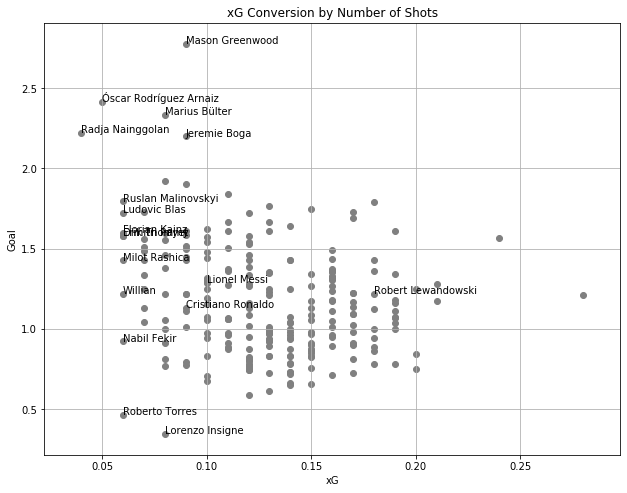

In [61]:
import matplotlib.pyplot as plt
import numpy as np


npxGpSh = new_goals["npxG/Sh"].values
npxGcon = new_goals["npxGcon"].values
numSh = new_goals["Sh"].values
npxG = new_goals["npxG"]
npG = (new_goals["np:G-xG"]+new_goals["npxG"]).values
# print(npxGpSh.max())
# print(npxGcon.max())

avg_npxGpSh = npxGpSh.mean()
avg_npxGcon = npxGcon.mean()

fig=plt.figure(figsize=(8, 6))
fig.set_facecolor("white")
ax=fig.add_axes([0,0,1,1])
# ax.set_yticks(np.arange(0,20,2))
ax.scatter(npxGpSh, npxGcon, color='grey')
ax.set_xlabel('xG')
ax.set_ylabel('Goal')
ax.set_title('xG Conversion by Number of Shots')
plt.grid(True)
for i, txt in enumerate(new_goals["Player"].values):
    if ((npxGpSh[i] > 15) and (npxGcon[i] > 1.5)) \
            or (npxGpSh[i] > 14) or (npxGcon[i]>=2)\
            or (npxGcon[i]<0.5) or (npxGpSh[i]<0.07)\
            or ("Messi" in txt) or ("Ronaldo" in txt)\
            or ("Lewandowski" in txt):
        ax.annotate(txt, (npxGpSh[i], npxGcon[i]))
# z = np.polyfit(npxGpSh, npxGcon, 1)
# p = np.poly1d(z)
# plt.plot(npxGpSh,p(npxGpSh),"r-")
plt.show()

In [56]:
print(new_goals[new_goals["Player"].str.contains("Insigne")])

        Rk           Player  Nation   Pos   Squad        Comp   Age    Born  \
1149  1150  Lorenzo Insigne  it ITA  FWMF  Napoli  it Serie A  28.0  1991.0   

       90s  Gls  ...  SoT/90  G/Sh  G/SoT    xG  npxG  npxG/Sh  G-xG  np:G-xG  \
1149  29.3    7  ...    1.26  0.03   0.08  11.8   8.7     0.08  -4.8     -5.7   

      Matches   npxGcon  
1149  Matches  0.344828  

[1 rows x 27 columns]


In [66]:
new_goals[new_goals["npxG/Sh"]<0.1][
    ["Player","np:G-xG","npxGcon","npxG/Sh","npxG"]].sort_values(by=["np:G-xG"])

,Player,np:G-xG,npxGcon,npxG/Sh,npxG
1149,Lorenzo Insigne,-5.7,0.344828,0.08,8.7
2494,Roberto Torres,-2.3,0.465116,0.06,4.3
501,Federico Chiesa,-2.0,0.777778,0.09,9.0
2019,Fabio Quagliarella,-1.4,0.810811,0.08,7.4
1512,Marco Mancosu,-1.3,0.793651,0.09,6.3
435,Sergio Canales,-0.9,0.769231,0.08,3.9
1948,Andrea Petagna,-0.7,0.909091,0.08,7.7
820,Nabil Fekir,-0.5,0.923077,0.06,6.5
2122,Dani Rodríguez,0.0,1.000000,0.08,4.0
1705,Mason Mount,0.1,1.014493,0.09,6.9
